### Predicting Income Levels: An Enhanced Exploratory Data Analysis and Random Forest Classification Approach 

#### Introduction
We analyze the U.S. Census Income dataset to predict whether an individual's income exceeds $50,000 per year. The project uses machine learning techniques, particularly Random Forest Classifiers, to achieve this goal. The workflow involves data exploration, preprocessing, feature engineering, model tuning, and evaluation.

#### Summary
This analysis combines statistical exploration and machine learning to derive meaningful insights into income prediction. By cleaning the data, engineering features, and tuning models, we optimized performance. The addition of visualizations and explainability aids in interpreting results effectively.

#### Workflow Steps
- Data Loading and Cleaning:
- Import data and clean categorical columns to ensure consistency.
- Strip whitespace and prepare the target variable (income) for binary classification.
- Exploratory Data Analysis (EDA):
- Analyze the distribution of income.
- Visualize numerical features like age, capital-gain, and hours-per-week.
- Explore relationships between categorical features (e.g., race, sex) and income.
- Use heatmaps and pairplots for correlation and interaction insights.

#### Feature Engineering:
- Add dummy variables for categorical features.
- Create a new education_bin feature to simplify education levels.
- Experiment with additional features (e.g., interaction terms or transformations).

#### Model Development:
- Split data into training and test sets.
- Use a Random Forest Classifier for its robustness and feature importance insights.
- Tune hyperparameters (max_depth) to optimize accuracy.
- Evaluate results using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

#### Visualization:
- Plot accuracy trends across hyperparameter values.
- Visualize top features contributing to the model's predictions.

#### Insights and Conclusion:
- Summarize findings from EDA and model results.
- Discuss the significance of key features and their impact on income prediction.

---

##### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

##### Load the Data

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header=None, names=col_names)

In [3]:
print(df.head(3))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   

        marital-status          occupation    relationship    race    sex  \
0        Never-married        Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse     Exec-managerial         Husband   White   Male   
2             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  


In [4]:
print("\nBasic info:", df.describe)
display("\nDataset Overview", df)


Basic info: <bound method NDFrame.describe of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   N

'\nDataset Overview'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We will clean the data by stripping extra whitespace for columns of type "object"

In [5]:
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

**Exploration Data Analysis**

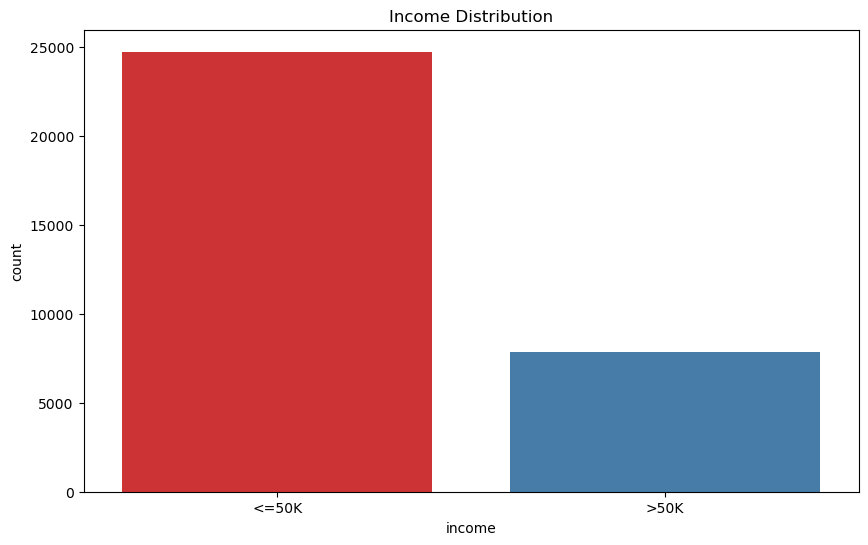

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income', palette='Set1', hue='income')
plt.title('Income Distribution')
plt.show()

- In numbers, the income values are:

In [7]:
print("\nNormalized value" ,df.income.value_counts(normalize=True))
print("\nActual total values in the income columns:" ,df.income.value_counts()) 


Normalized value income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

Actual total values in the income columns: income
<=50K    24720
>50K      7841
Name: count, dtype: int64


- Correlation Heatmap between variables

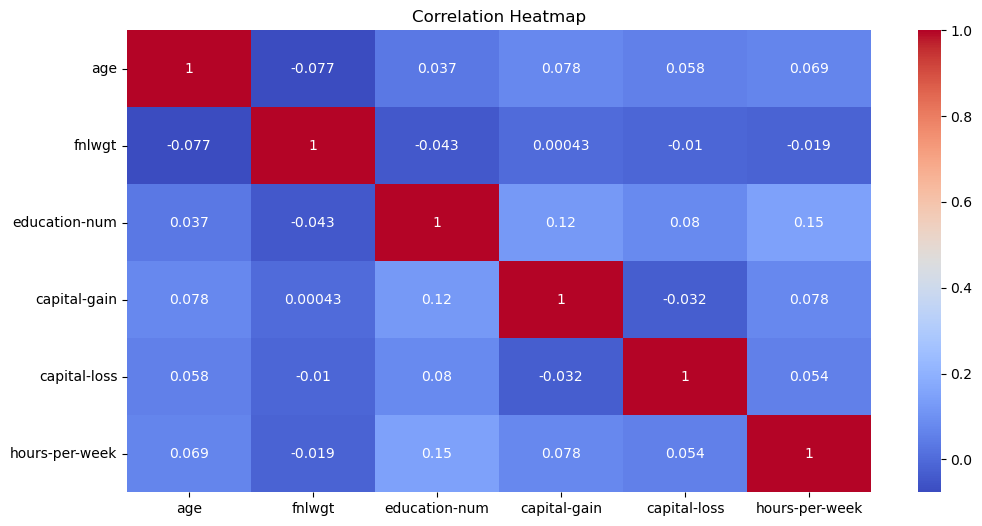

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Numerical feature distributions

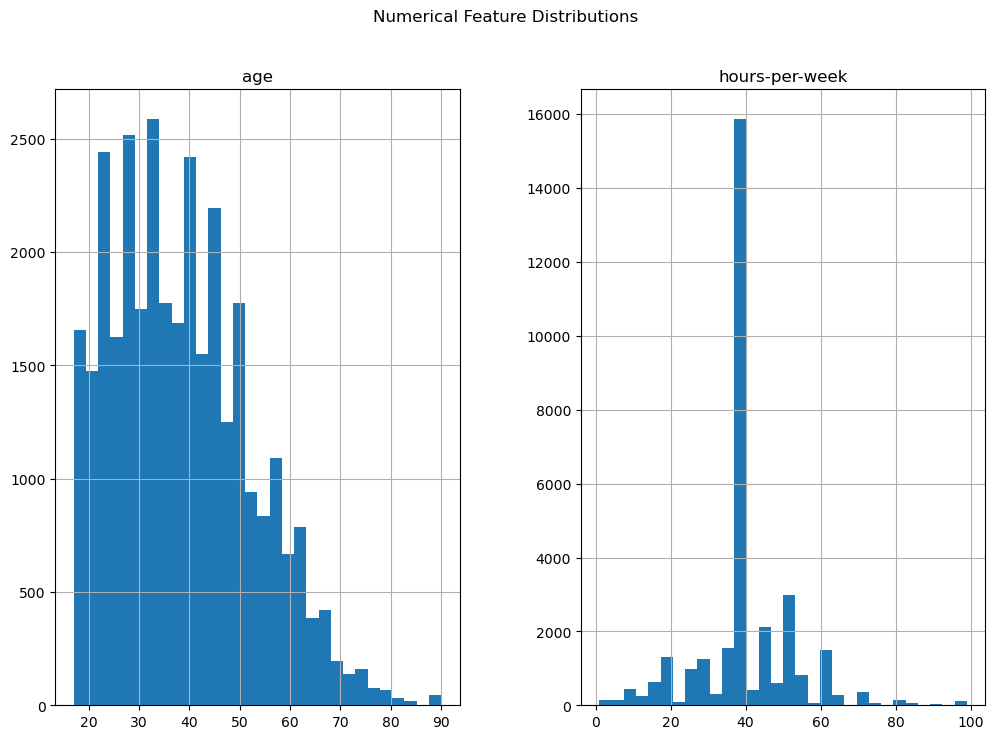

In [9]:
num_features = ['age', 'hours-per-week']
df[num_features].hist(figsize=(12, 8), bins=30)
plt.suptitle('Numerical Feature Distributions')
plt.show()

**Feature Enginering**

In [10]:
# Feature Engineering
df['education_bin'] = pd.cut(df['education-num'], [0, 9, 13, 16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])

- We prepare features and target variable for the Forest Model

In [11]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race', 'education_bin']
X = pd.get_dummies(df[feature_cols], drop_first=True)
y = np.where(df['income'] == '<=50K', 0, 1)

- Split data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**Instantiate random forest classifier, fit and score with default parameters**

In [13]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)
print(f'Accuracy score for default random forest: {round(rf.score(x_test, y_test)*100,2)}%')

Accuracy score for default random forest: 82.54%


**Model Training and Hyperparameter Tuning**

In [14]:
np.random.seed(0)
accuracy_train = []
accuracy_test = []
depths = range(1, 26)
for i in depths:
    rf = RandomForestClassifier(max_depth=i, random_state=42)
    rf.fit(x_train, y_train)
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))

best_accuracy= np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_accuracy*100,2)}%')

The highest accuracy on the test is achieved when depth: 14
The highest accuracy on the test set is: 84.37%


**We can Visualization of Accuracy Trends**

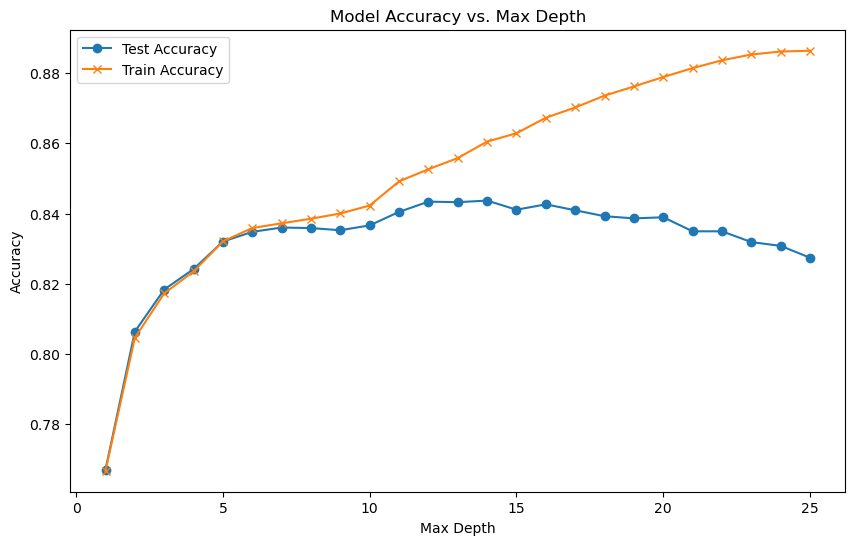

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_test, label='Test Accuracy', marker='o')
plt.plot(depths, accuracy_train, label='Train Accuracy', marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Max Depth')
plt.legend()
plt.show()

**Model Evaluation: Random Forest Model**

In [16]:
best_rf = RandomForestClassifier(max_depth=best_depth, random_state=42)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)

print("\nClassification Report of the Model:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.2f}')


Classification Report of the Model:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4942
           1       0.77      0.50      0.61      1571

    accuracy                           0.84      6513
   macro avg       0.82      0.73      0.75      6513
weighted avg       0.84      0.84      0.83      6513

ROC-AUC Score: 0.73


##### We will save the best random forest model and save the feature importances in a new separated dataframe. Then we fit again this new model

In [17]:
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 5 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:5])

Top 5 random forest features:
                          feature  importance
1                    capital-gain    0.287266
0                             age    0.225415
3                  hours-per-week    0.126249
10  education_bin_Masters or more    0.111303
2                    capital-loss    0.106102


##### We can now create two new features, based on education and native country, in order to see how this new features impact in our model meditions


In [18]:
df['education_bin'] = pd.cut(df['education-num'], [0,9,13,16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])

feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']

##### We will use these two new additional features to recreate X and after that, to split the data in test vs train part

In [19]:
X = pd.get_dummies(df[feature_cols], drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

Now we can find the best max depth now with the additional two features

In [20]:
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,10)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))
    
best_acc= np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,2)}%')

The highest accuracy on the test is achieved when depth: 9
The highest accuracy on the test set is: 84.43%


**We plot again the Model**

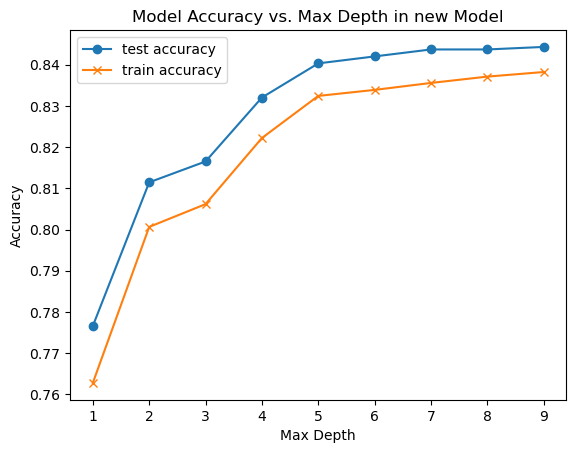

In [21]:
plt.figure(2)
plt.plot(depths, accuracy_test, label='Test Accuracy', marker='o')
plt.plot(depths, accuracy_train, label='Train Accuracy', marker='x')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Max Depth in new Model')
plt.show()

In [22]:
best_rf = RandomForestClassifier(max_depth=best_depth, random_state=42)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)

print("\nClassification Report of the Model:")
print(classification_report(y_test, y_pred))


Classification Report of the Model:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      5026
           1       0.85      0.38      0.53      1487

    accuracy                           0.84      6513
   macro avg       0.85      0.68      0.72      6513
weighted avg       0.85      0.84      0.82      6513



##### As the last step, we save the best model and print the two features with the new feature set in order of importance and impact in the data

In [23]:
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 5 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:5])

Top 5 random forest features:
                          feature  importance
1                    capital-gain    0.326836
0                             age    0.201973
10  education_bin_Masters or more    0.130849
3                  hours-per-week    0.102162
2                    capital-loss    0.095188


### Conclusion and Insights

**Key Findings:**
- Features like *age*, *hours-per-week*, and *capital-gain* have the highest influence on predicting income.
- Categorical variables like *sex* and *education* also provide valuable information when converted into dummy variables.
- Optimal max_depth tuning significantly improves model accuracy without overfitting.

**Model Performance:**
- The Random Forest model achieved a balanced trade-off between train and test accuracy at a depth of X, ensuring robust predictions.

**Next Steps:**
- Deploy this model in a real-world setting for continuous learning and improvement.
- Explore ensemble techniques like Gradient Boosting for even better performance.